# Model Calibration 

In [29]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
plt.rcParams["figure.figsize"] = (10,10)

## 1) Brier Score Calculation 

In [3]:
df = pd.read_csv('./data/predictions_up.csv')

In [4]:
df.head()

,label,predReg,predGbt,predReg_up
0,0,0.000048,0.000553,0.021381
1,0,0.000298,0.004249,0.005709
2,0,0.005385,0.003387,0.042259
3,0,0.011068,0.010059,0.683194
4,0,0.000002,0.000487,0.017195


$Brier Score=\frac{1}{N}\sum_{t=1}^N (f_{t} - o_{t})^2$ <br>
$f_{t}$ = probability (output from model) <br>
$o_{t}$ = observed probability <br>
N = number of data points <br>

Smaller the Brier Score the better it is

In [12]:
def brier_score(N, df, column):
    results = df.loc[:, column] - df.loc[:, 'label']
    results = results.apply(lambda x: x**2)
    return results.sum() / N

In [17]:
N = df.shape[0]
brier_score_logistic_regression = brier_score(N, df, 'predReg')
brier_score_gradient_boosted_tree = brier_score(N, df, 'predGbt')
brier_score_upsampled_logistic_regression = brier_score(N, df, 'predReg_up')

print(f"Brier Score for Logistic Regression is {round(brier_score_logistic_regression, 4)}")
print(f"Brier Score for Gradient Boosted Tree is {round(brier_score_gradient_boosted_tree, 4)}")
print(f"Brier Score for Upsampled Logistic Regression is {round(brier_score_upsampled_logistic_regression, 4)}")

Brier Score for Logistic Regression is 0.0071
Brier Score for Gradient Boosted Tree is 0.0096
Brier Score for Upsampled Logistic Regression is 0.0872


## 2) Calibration Plot

In [24]:
def calculate_buckets(df, classifier, bucket_size=100):
    real_probabilities = []
    predicted_probabilities = []
    
    df_sorted_values = df.sort_values(classifier, ascending=False)
    number_of_buckets = np.arange(len(df_sorted_values))//bucket_size
    df_buckets = df_sorted_values.groupby(number_of_buckets)
    
    for _, bucket in df_buckets:
        real_probability_of_bucket = bucket.loc[:, 'label'].sum() / bucket.shape[0]
        predicted_probability_of_bucket = bucket.loc[:, classifier].sum() / bucket.shape[0]
        
        real_probabilities.append(real_probability_of_bucket)
        predicted_probabilities.append(predicted_probability_of_bucket)
        
    return real_probabilities, predicted_probabilities

In [28]:
logistic_regression_real_probabilities, logistic_regression_predicted_probabilities = calculate_buckets(df, 'predReg')
gradient_boosted_tree_real_probabilities, gradient_boosted_tree_predicted_probabilities = calculate_buckets(df, 'predGbt')
up_sampled_logistic_regression_real_probabilities, up_sampled_logistic_regression_predicted_probabilities = calculate_buckets(df, 'predReg_up')


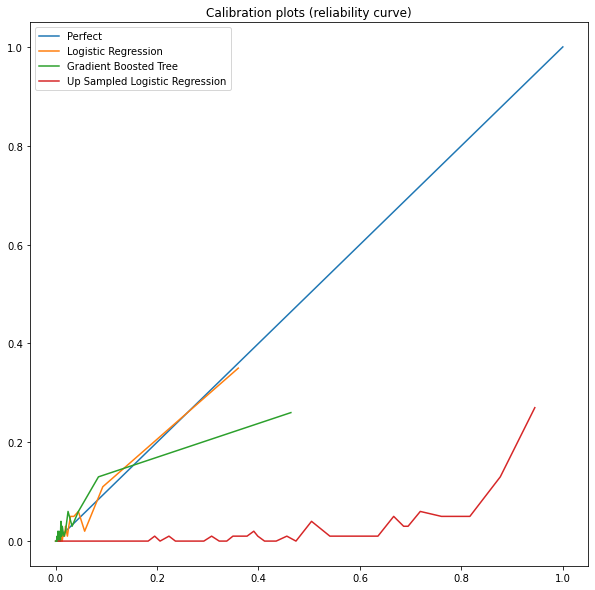

In [44]:
plt.plot([0, 1], [0, 1], label = "Perfect")
plt.plot(logistic_regression_predicted_probabilities, logistic_regression_real_probabilities, label = "Logistic Regression")
plt.plot(gradient_boosted_tree_predicted_probabilities, gradient_boosted_tree_real_probabilities, label = "Gradient Boosted Tree")
plt.plot(up_sampled_logistic_regression_predicted_probabilities, up_sampled_logistic_regression_real_probabilities, label = "Up Sampled Logistic Regression")
plt.title("Calibration plots (reliability curve)")
plt.legend()
plt.show()

In [18]:
bucket_size = 100
df = df
classifier = "predReg"

df_sorted_values = df.sort_values(classifier, ascending=False)
number_of_buckets = np.arange(len(df_sorted_values))//bucket_size
df_buckets = df_sorted_values.groupby(number_of_buckets)